# 決定木とランダムフォレスト（Random Forests）

[原作者のJoseさんのブログ](https://medium.com/towards-data-science/enchanted-random-forest-b08d418cb411)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

## ランダムフォレスト分類器

ランダムフォレスト（Random forests）は、アンサンブル学習法の1つ。アンサンブル学習法は、いくつかの分類器を集めて構成されるものであるが、ここでは決定木が使われる。

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 500, centers = 4, random_state = 8, cluster_std = 2.4)

In [3]:
X

array([[  8.031223  ,   1.07684647],
       [  0.79275323,  -8.49270872],
       [ -6.24741713,  -2.80979462],
       [  7.1350517 ,  -0.27620621],
       [  8.75371186,  12.16955042],
       [ -6.52850085,  -4.81571386],
       [ -5.68423308,  -8.6536682 ],
       [ -4.40557029, -10.14011553],
       [ -7.18713979,  -8.49782188],
       [  7.67125718,  15.33780796],
       [  7.05472091,   2.71136019],
       [ -6.44972594,  -8.50218035],
       [  7.3175591 ,   8.07104895],
       [  9.435827  ,  12.60240072],
       [ -3.94302873,  -8.45858333],
       [ -5.82070544, -11.54252584],
       [  5.45439833,  10.04943649],
       [  1.23496178,  -4.95053236],
       [  0.99142387,  -0.34084278],
       [ -4.89204127,  -6.95668615],
       [  6.09686891,   6.03480565],
       [ -0.70549841,  -3.44748449],
       [ -0.18012153,  -2.11546643],
       [ -3.20156642, -10.44698102],
       [  0.95069301,  -2.56593727],
       [ -0.75648703,   0.73537406],
       [ -0.74705664,   1.54560469],
 

In [4]:
y

array([1, 2, 2, 1, 0, 3, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 3, 3, 2, 0, 3, 3,
       2, 3, 3, 3, 1, 2, 0, 2, 3, 3, 2, 1, 0, 3, 0, 2, 1, 2, 1, 0, 3, 1, 3,
       0, 0, 0, 2, 1, 3, 1, 0, 0, 3, 2, 0, 2, 3, 0, 0, 0, 2, 0, 0, 1, 0, 2,
       0, 1, 1, 2, 1, 0, 2, 1, 2, 0, 1, 3, 2, 1, 2, 2, 2, 0, 2, 1, 0, 0, 3,
       1, 2, 0, 1, 3, 2, 1, 0, 2, 1, 2, 0, 0, 2, 1, 3, 0, 3, 0, 3, 0, 1, 0,
       0, 0, 1, 0, 3, 0, 0, 0, 0, 1, 0, 3, 2, 0, 1, 3, 1, 2, 1, 3, 1, 1, 3,
       3, 3, 0, 1, 2, 0, 1, 0, 2, 1, 3, 2, 1, 2, 3, 3, 2, 0, 3, 2, 3, 3, 1,
       0, 2, 3, 2, 0, 0, 3, 0, 1, 3, 2, 0, 0, 0, 2, 3, 3, 0, 1, 2, 3, 2, 0,
       1, 1, 1, 1, 0, 1, 3, 2, 2, 1, 2, 1, 3, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 2, 0, 3, 3, 3, 1, 3, 0, 3, 1, 0, 3, 1, 0, 2, 0, 1, 2, 3, 0,
       1, 3, 2, 0, 1, 3, 3, 1, 3, 2, 1, 2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 3, 2,
       1, 2, 2, 1, 0, 1, 2, 3, 3, 0, 2, 2, 0, 1, 0, 2, 3, 3, 0, 0, 3, 1, 1,
       0, 3, 3, 0, 1, 2, 0, 0, 0, 2, 3, 2, 1, 0, 3, 3, 2, 3, 1, 0, 0, 3, 3,
       0, 3,

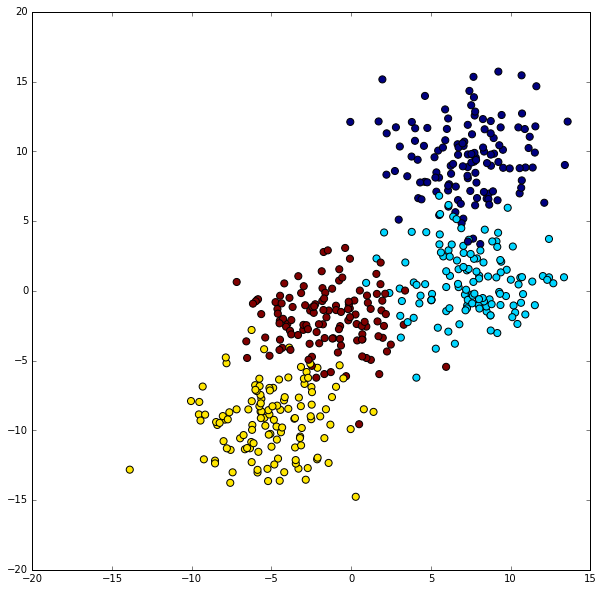

In [5]:
# 散布図
plt.figure(figsize = (10, 10))
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'jet')

In [6]:
from sklearn.tree import DecisionTreeClassifier

## 描画のための関数

In [7]:
def visualize_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    '''
    決定木の可視化をします。
    INPUTS: 分類モデル, X, y, optional x/y limits.
    OUTPUTS: Meshgridを使った決定木の可視化
    '''
    # fitを使ったモデルの構築
    classifier.fit(X, y)
    
    # 軸を自動調整
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    x_min, x_max = xlim
    y_min, y_max = ylim
    
    
    # meshgridをつくります。
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # 分類器の予測をZとして保存
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # meshgridを使って、整形します。
    Z = Z.reshape(xx.shape)
    
    # 分類ごとに色を付けます。
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    
    # 訓練データも描画します。
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    def plot_boundaries(i, xlim, ylim):
        '''
        境界線を描き込みます。
        '''
        if i < 0:
            return

        tree = classifier.tree_
        
        # 境界を描画するために、再帰的に呼び出します。
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

深さ2までのプロットを描いてみる。

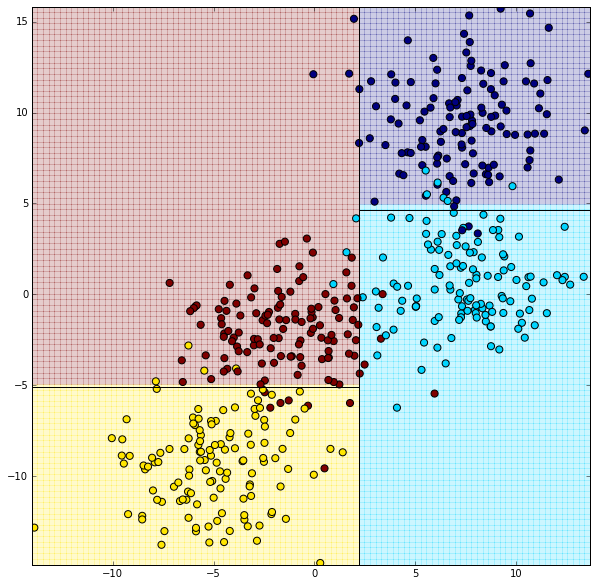

In [9]:
# モデルを作る
clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)

# 描画する
visualize_tree(clf, X, y)

深さを4にする。

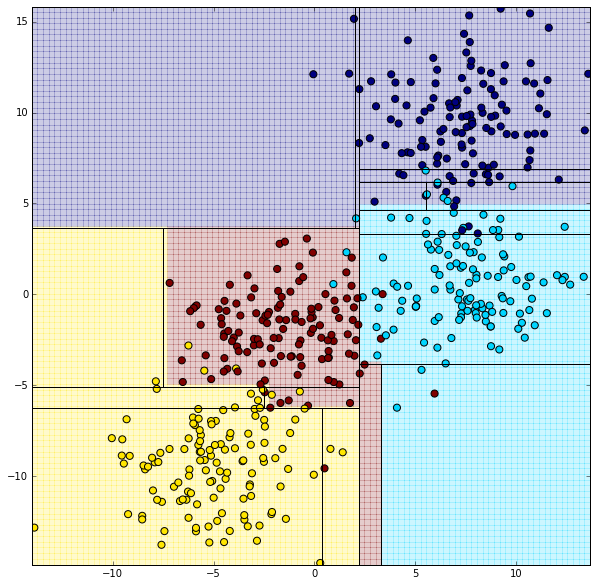

In [10]:
clf = DecisionTreeClassifier(max_depth = 4, random_state = 0)

visualize_tree(clf, X, y)

あまりにも細かく分類すると、過学習（overfitting）の問題が起こる。

## Random Forests

過学習の問題を回避するための1つの方法が、ランダムフォレスト。

ランダムフォレストは、学習データの一部をランダムに選んで、決定木を作る。
これを繰り返すことによって、色々な種類の木が出来るので、汎化性能が下がるのを避けることができる。

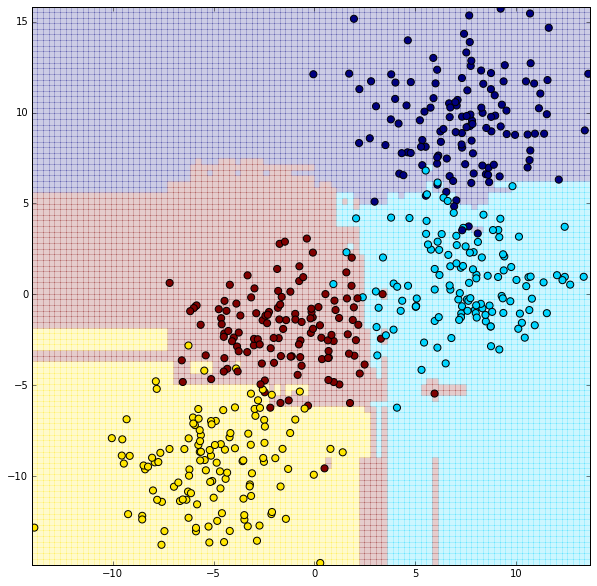

In [11]:
from sklearn.ensemble import RandomForestClassifier

# n_estimatorsは、作る木の数。
clf = RandomForestClassifier(n_estimators = 100, random_state = 0)

# 境界線を描かないようにする
visualize_tree(clf, X, y, boundaries = False)

決定木とは違った境界線が描かれているのがわかる。

## Random Forest Regression

ランダムフォレストは、分類だけではなく、回帰にも使うことができる。

ダミーのデータを使って試してみる。

<Container object of 3 artists>

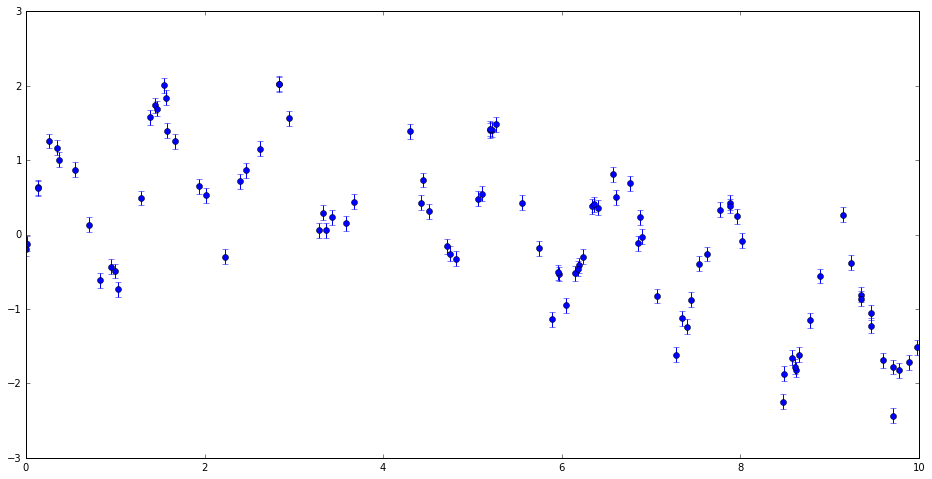

In [17]:
from sklearn.ensemble import RandomForestRegressor

x = 10 * np.random.rand(100)

def sin_model(x, sigma = 0.2):
    '''大きな波　＋ 小さな波 + ノイズからなるダミーデータ'''
    noise = sigma * np.random.randn(len(x))
    return np.sin(5 * x) + np.sin(0.5 * x) + noise

# xからyを計算
y = sin_model(x)

# plotする
plt.figure(figsize = (16, 8))
plt.errorbar(x, y, 0.1, fmt = 'o')

このようなデータを単純な線形回帰で予測しようとしても難しいのは、一目瞭然。
ランダムフォレストを使ってみる。

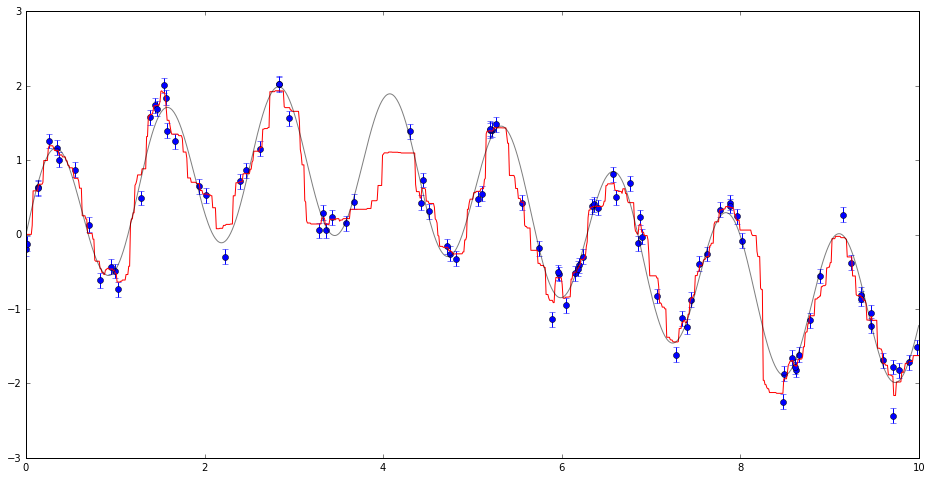

In [18]:
# Xを用意
xfit = np.linspace(0, 10, 1000)

# 回帰モデルを用意する
rfr = RandomForestRegressor(100)

# モデルを学習させる
rfr.fit(x[:, None], y)

# 予測値を計算する
yfit = rfr.predict(xfit[:, None])

# 実際の値
ytrue = sin_model(xfit, 0)

# plotする
plt.figure(figsize = (16, 8))
plt.errorbar(x, y, 0.1, fmt = 'o')

plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha = 0.5);

ランダムフォレストは、このように分類だけではなく回帰にも使えるので、非常に応用範囲が広い方法論。